# Notebook για κώδικα σχεδίασης στοιχειωδών σχημάτων 3
# Αλγόριθμος Bresenham
#### Αρχείο Jupyter notebook

In [1]:
import numpy as np 
from PIL import Image
from matplotlib import pyplot as plt 

# Δημιουργία συνάρτησης "setpixel"
def setpixel(x, y, colour, img):
    # Αυτή η συνάρτηση 'βάφει' το pixel στις συντεταγμένες (x,y) με το χρώμα 'colour'. 
    # To 'colour' πρέπει να είναι κάποιος ακέραιος στο 0..255 .
    # img είναι ο πίνακας που αντιστοιχεί στην ψηφιογραφική εικόνα (raster image) που θέλουμε να επεξεργαστούμε.
    imagedimensions = img.shape
    x1 = x + imagedimensions[1] // 2
    y1 = -y + imagedimensions[0] // 2
    if(y1 < 0 or y1 >= imagedimensions[0]):
        return(img)
    if(x1 < 0 or x1 >= imagedimensions[1]):
        return(img)
    img[y1, x1] = colour
    return(img)

In [6]:
def draw_line_bresenham(x1, y1, xn, yn, colour, img):
    # Ποιός είναι ο άξονας ταχύτερης κίνησης;
    if(np.abs(yn-y1) > np.abs(xn-x1)):
        fastest_is_y = True
    else:
        fastest_is_y = False
    if(fastest_is_y):
        x1, xn, y1, yn = y1, yn, x1, xn
    # Είναι x1 < xn;
    if(x1 > xn):
        # Τότε πρέπει να ανταλλάξω το αρχικό με το τελικό σημείο
        x1, xn, y1, yn = xn, x1, yn, y1
    dx = xn - x1
    dy = yn - y1
    error = -dx // 2
    y = y1
    # Ο άλλος άξονας αυξάνεται ή μειώνεται;
    if(y1 < yn):
        ystep = 1
    else:
        ystep = -1
    ##########################
    ## Άρχισε σχεδίαση
    ##########################
    for x in range(x1,xn+1):
        if(fastest_is_y):
            img = setpixel(y,x,colour,img)
        else:
            img = setpixel(x,y,colour,img)
        error = error + np.abs(dy)
        if(error >= 0):
            y = y + ystep
            error = error - dx
    return(img)

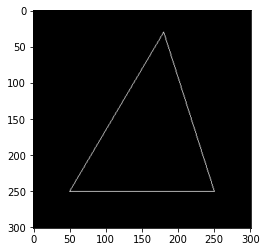

In [8]:
framebuffer = np.zeros([301, 301])
framebuffer = draw_line_bresenham(-100, -100, 100, -100, 255, framebuffer)
framebuffer = draw_line_bresenham( 100, -100,  30,  120, 255, framebuffer)
framebuffer = draw_line_bresenham(  30,  120,-100, -100, 255, framebuffer)
plt.imshow(framebuffer, cmap='gray', interpolation='bilinear')
plt.show()

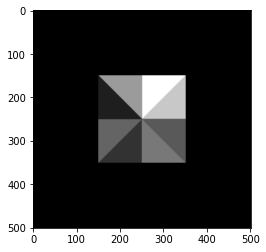

In [19]:
framebuffer = np.zeros([501, 501])
for i in range(0, 101):
    framebuffer = draw_line_bresenham(0, 0, i, 100, 255, framebuffer)   #Οκταμόριο 2
    framebuffer = draw_line_bresenham(0, 0, -i, -100, 50, framebuffer)  #Οκταμόριο 6
    framebuffer = draw_line_bresenham(0, 0, 100, i, 200, framebuffer)   #Οκταμόριο 1
    framebuffer = draw_line_bresenham(0, 0, -100, -i, 100, framebuffer)  #Οκταμόριο 5
    framebuffer = draw_line_bresenham(0, 0, -i, 100, 155, framebuffer)   #Οκταμόριο 3
    framebuffer = draw_line_bresenham(0, 0, +i, -100, 120, framebuffer)  #Οκταμόριο 7
    framebuffer = draw_line_bresenham(0, 0, 100, -i, 90, framebuffer)   #Οκταμόριο 8
    framebuffer = draw_line_bresenham(0, 0, -100, i, 30, framebuffer)   #Οκταμόριο 4

plt.imshow(framebuffer, cmap='gray', interpolation='bilinear')
plt.show()

In [20]:
def draw_triangle(x1, y1, x2, y2, x3, y3, colour, framebuffer):
    framebuffer = draw_line_bresenham(x1, y1, x2, y2, colour, framebuffer)
    framebuffer = draw_line_bresenham(x2, y2, x3, y3, colour, framebuffer)
    framebuffer = draw_line_bresenham(x3, y3, x1, y1, colour, framebuffer)
    return(framebuffer)

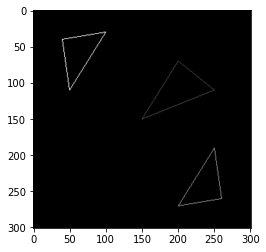

In [22]:
framebuffer = np.zeros([301, 301])
framebuffer = draw_triangle(-100 , 40 , -110 , 110, -50, 120, 255, framebuffer)
framebuffer = draw_triangle(+100, -40, +110, -110, +50, -120, 155, framebuffer)
framebuffer = draw_triangle(0, 0, 100, 40, 50, 80, 80, framebuffer)
plt.imshow(framebuffer, cmap='gray', interpolation='bilinear')
plt.show()